### Capabilities of Gemini with Vision

In [1]:
from dotenv import load_dotenv
import os

load_dotenv()
import google.generativeai as genai
genai.configure(api_key=os.getenv('GCP_API_KEY'))

In [2]:
model = genai.GenerativeModel("gemini-pro-vision")

In [3]:
import http.client
import typing
import urllib.request
import IPython.display
from PIL import Image as PIL_Image
from PIL import ImageOps as PIL_ImageOps

In [4]:
def show_image_set(
    image_collection: typing.Iterable[PIL_Image.Image],  # Updated type hint
    width_limit: int = 600,
    height_limit: int = 350,
) -> None:
    for img in image_collection:
        processed_image = img
        if processed_image.mode != "RGB":
            processed_image = processed_image.convert("RGB")
        img_width, img_height = processed_image.size
        if width_limit < img_width or height_limit < img_height:
            processed_image = PIL_ImageOps.contain(processed_image, (width_limit, height_limit))
        IPython.display.display(processed_image)

In [5]:
def load_image_from_uri(uri: str) -> PIL_Image.Image:
    if uri.startswith("gs://"):
        response = requests.get(transform_gcs_uri(uri))
        return PIL_Image.open(io.BytesIO(response.content))
    else:
        response = requests.get(uri)
        return PIL_Image.open(io.BytesIO(response.content))

In [6]:
def transform_gcs_uri(gcs_uri: str) -> str:
    web_url = "https://storage.googleapis.com/" + gcs_uri.replace("gs://", "").replace(" ", "%20")
    return web_url

In [7]:
def print_prompt_input(multimodal_data: list):
    for item in multimodal_data:
        if isinstance(item, PIL_Image.Image):
            show_image_set([item])
        else:
            print(item)

### Generating Text from a Given Local Picture and Text

The prompt:


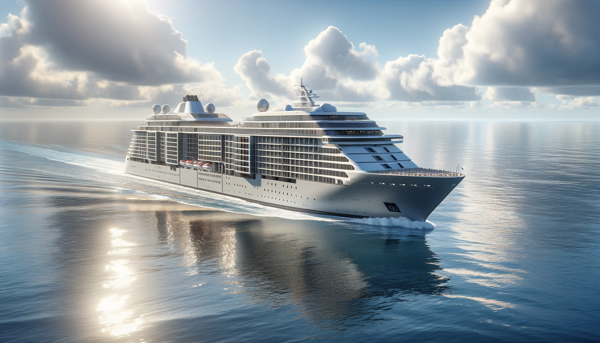

Describe the picture provided to you.

The response:
 The picture shows a large cruise ship sailing on the open ocean. The ship has a white hull and a gray superstructure. It is surrounded by a large wake. The sky is blue and there are some clouds in the distance.

In [8]:
image_path = "image.png"
image = PIL_Image.open(image_path)

prompt = "Describe the picture provided to you."
contents = [image, prompt]

responses = model.generate_content(contents, stream=True)

print("The prompt:")
print_prompt_input(contents)

print("\nThe response:")
for response in responses:
    print(response.text, end="")

### Generating Text based on Picture in Google Cloud Storage

The prompt:


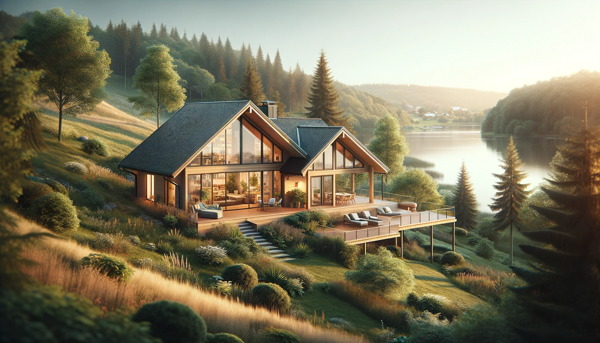

Describe the picture provided to you.

The response:
 The picture shows a modern house on a hill. The house is made of wood and glass and has a large deck with a view of the lake. The trees are in full bloom and the sun is shining.

In [9]:
import io
import requests
    
gcs_uri = "gs://gemini-sample-bucket/image2.png"
image = load_image_from_uri(gcs_uri)

# Prepare contents
prompt = "Describe the picture provided to you."
contents = [image, prompt]

responses = model.generate_content(contents, stream=True)

print("The prompt:")
print_prompt_input(contents)

print("\nThe response:")
for response in responses:
    print(response.text, end="")

The prompt:


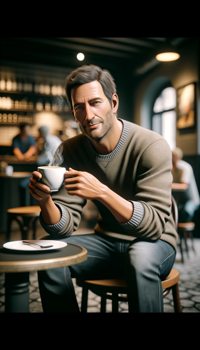

Describe the picture provided to you.

The response:
 The picture is of a man sitting in a coffee shop. He is wearing a brown sweater and jeans. He has a cup of coffee in his hands and is looking at the camera. There are other people in the coffee shop in the background.

In [10]:
image_url = (
    "https://storage.googleapis.com/gemini-sample-bucket/image3.png"
)
image = load_image_from_uri(image_url)

prompt = "Describe the picture provided to you."
contents = [image, prompt]

responses = model.generate_content(contents, stream=True)

print("The prompt:")
print_prompt_input(contents)

print("\nThe response:")
for response in responses:
    print(response.text, end="")

### Integrating Multiple Images for Prompting

The prompt:


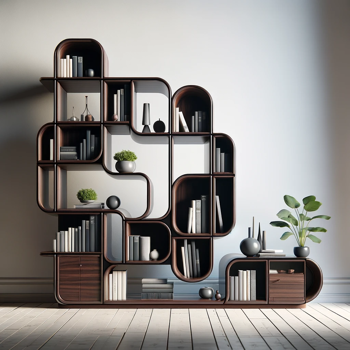

{"Furniture": "Bookshelf", "Look:", "Modern"}


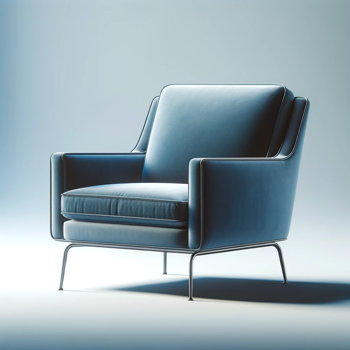

{"Furniture": "Chair", "Look:", "Modern"}


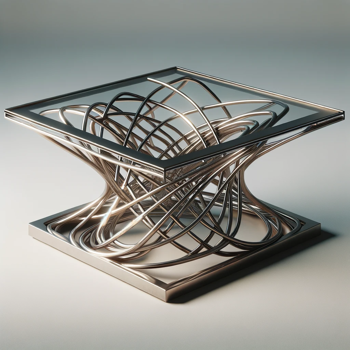


The response:
 {"Furniture": "Table", "Look:", "Modern"}

In [11]:
# Load images from Cloud Storage URI
image_url_1 = "https://storage.googleapis.com/gemini-sample-bucket/image5.png"
image_url_2 = "https://storage.googleapis.com/gemini-sample-bucket/image6.png"
image_url_3 = "https://storage.googleapis.com/gemini-sample-bucket/image7.png"

image1 = load_image_from_uri(image_url_1)
image2 = load_image_from_uri(image_url_2)
image3 = load_image_from_uri(image_url_3)

# Prepare prompts
prompt1 = """{"Furniture": "Bookshelf", "Look:", "Modern"}"""
prompt2 = """{"Furniture": "Chair", "Look:", "Modern"}"""

# Prepare contents
contents = [image1, prompt1, image2, prompt2, image3]

responses = model.generate_content(contents, stream=True)

print("The prompt:")
print_prompt_input(contents)

print("\nThe response:")
for response in responses:
    print(response.text, end="")